In [2]:
# ZADANIE NUMERYCZNE 1 - DYSKRETNA POCHODNA: SZACOWANIE BŁĘDU DLA RÓŻNYCH WARTOŚCI h 
# Proszę wybaczyć mieszanie polskiego z angielskim, nie potrafię się przemóc na pisanie kodu po polsku
# Komórki należy uruchamiać w kolejności, a najwygodniej użyć opcji Cell->Run all. Uruchamianie pojedyńczej komórki: shift+enter
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Nic bardzo odkrywczego, zakodowane funkcje z polecenia, z obsługą błędu (gdyby wylosowało 0) z uwzględnieniem precyzji jaką chcemy operować, domyślna funkcja
# i argument to te z polecenia czyli sin(0.2)

def derivative_approx_a(h_value, precision=np.float32, function=np.sin, argument=0.2):
    ''' h_value can be both an array and a singular value'''
    h_value = precision(h_value)
    argument = precision(argument)
    try:
        if h_value == 0:
            print("Dividing by zero is illegal and ima sheriff in this town so I won't have it.")
            return float('nan')
    except ValueError:
        if h_value.any() == 0:
            print("Dividing by zero is illegal and ima sheriff in this town so I won't have it.")
            return float('nan')
    return (precision(function(argument+h_value)) - precision(function(argument))) / h_value


def derivative_approx_b(h_value, precision=np.float32, function=np.sin, argument=0.2):
    ''' h_value can be both an array and a singular value'''
    h_value = precision(h_value)
    argument = precision(argument)
    try:
        if h_value == 0:
            print("Dividing by zero is illegal and ima sheriff in this town so I won't have it.")
            return float('nan')
    except ValueError:
        if h_value.any() == 0:
            print("Dividing by zero is illegal and ima sheriff in this town so I won't have it.")
            return float('nan')
    return (precision(function(argument+h_value)) - precision(function(argument-h_value))) / (2*h_value)
        

In [4]:
# Funkcje do obliczania błędu przybliżenia

def calculate_error_a(h_value, precision=np.float32, function=np.sin, derivative=np.cos, argument=0.2):
    return abs(derivative_approx_a(h_value, precision=precision, function=function, argument=argument) - derivative(argument))


def calculate_error_b(h_value, precision=np.float32, function=np.sin, derivative=np.cos, argument=0.2):
    return abs(derivative_approx_b(h_value, precision=precision, function=function, argument=argument) - derivative(argument))


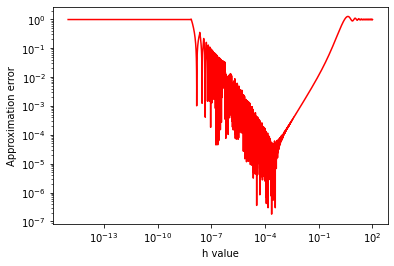

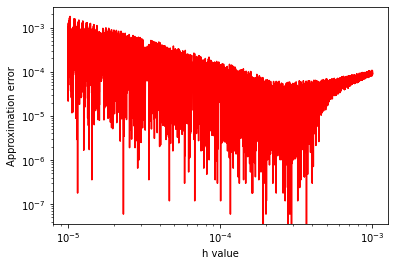

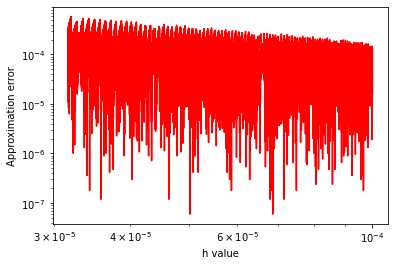

In [195]:
# Cały kod poniżej postępuje według jednego schematu:
# 1. Generujemy równo rozłożone h z zakresu 10^[pierwsza liczba], 10^[druga liczba]
# 2. Generujemy y, czyli błąd przybliżenia dla każdego z podanych h
# 3. Przenosimy wyniki na wykres, z odpowiednimi podpisami i w skali logarytmicznej (log10)
# UWAGA: generowanie wykresów może zająć kilka sekund
# Wykresy dla funckji a) z dokładnością obliczeniową float

x = np.logspace(-15, 2, num=10**4, dtype=np.float32)
y = calculate_error_a(x)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function a) with float")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Widać, że wykres pokrywa się z intuicją, dla zbyt dużych h oczywiście przybliżenie nie jest zbyt dobre, jednak dla zbyt małych
# również, ponieważ dzielimy przez bardzo małą liczbę. Widać też charakterystyczny pik w okolicach 10^-4, co sugeruje jaką 
# wartość może mieć optymalne h. Spróbujmy tam zerknąć.

x = np.logspace(-5, -3, num=10**4, dtype=np.float32)
y = calculate_error_a(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function a) with float")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Widać, że pierwsze wrażenie było mylne, a optymalna wartość mieści się jednak między 10^-4 a 10^-3. Głębiej...

x = np.logspace(-4.5, -4, num=10**4, dtype=np.float32)
y = calculate_error_a(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function a) with float")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Tutaj moja ciekawość musi się zatrzymać - widać jednak, że mamy potencjalnie wiele dobrych h, natomiast sam wzór wydaje się 
# być numerycznie źle uwarunkowany

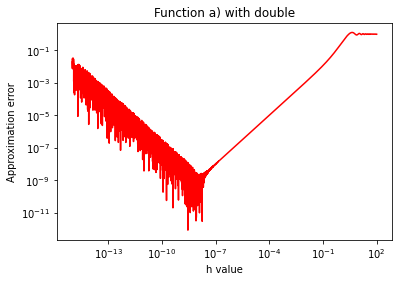

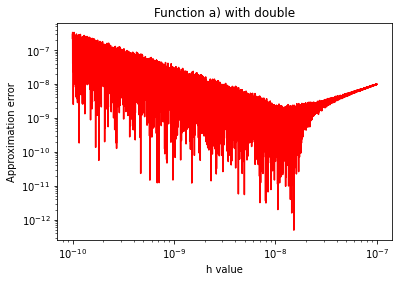

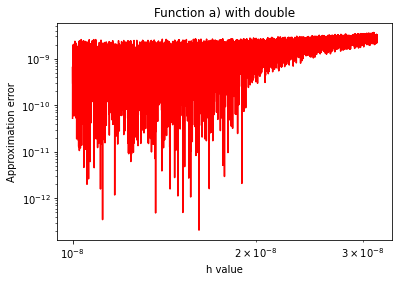

In [208]:
# Teraz możemy wykonać te same wykresy dla pozostałych kombinacji (funkcja + float/double)
# Funkcja a) + typ double

x = np.logspace(-15, 2, num=10**4, dtype=np.float64)
y = calculate_error_a(x, precision=np.float64)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function a) with double")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Tym razem, optymalna wartość h mieści się gdzieś w okolicach 10^-8

x = np.logspace(-10, -7, num=10**4, dtype=np.float64)
y = calculate_error_a(x, precision=np.float64)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function a) with double")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Zejdźmy głębiej...

x = np.logspace(-8, -7.5, num=10**4, dtype=np.float64)
y = calculate_error_a(x, precision=np.float64)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function a) with double")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Optymalne h w okolicy 1.5*10^-8

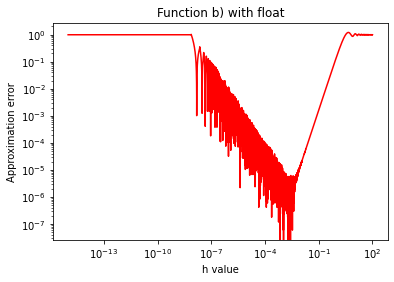

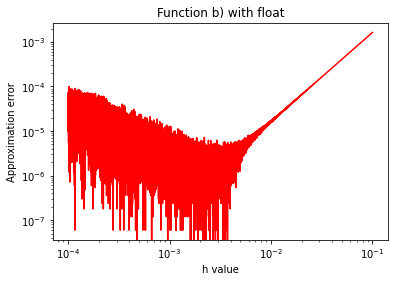

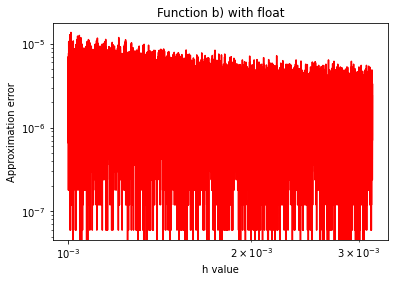

In [209]:
# Zachowanie funkcji z podpunktu b) :
x = np.logspace(-15, 2, num=10**4, dtype=np.float32)
y = calculate_error_b(x, precision=np.float32)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function b) with float")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Optymalne h w okolicach 10^-3

x = np.logspace(-4, -1, num=10**4, dtype=np.float32)
y = calculate_error_b(x, precision=np.float32)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function b) with float")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Głębiej...

x = np.logspace(-3, -2.5, num=10**4, dtype=np.float32)
y = calculate_error_b(x, precision=np.float32)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.locator_params(axis='x', nbins=3)
plt.ylabel("Approximation error")
plt.title("Function b) with float")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Widać, że mamy potencjalnie wiele dobrych h do wyboru

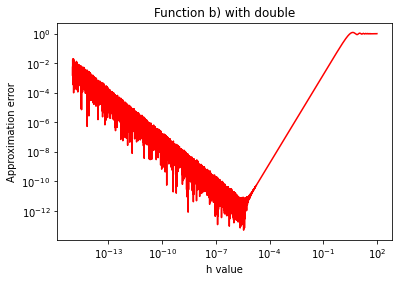

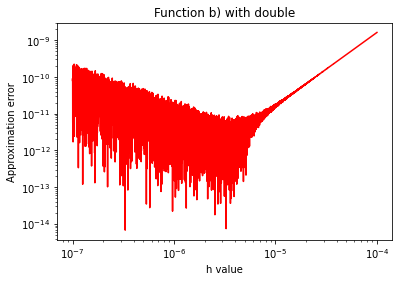

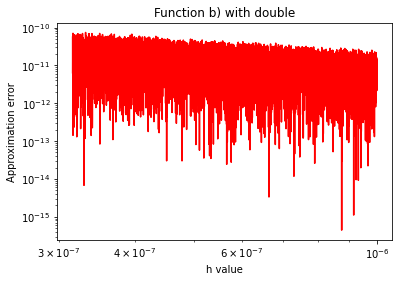

In [210]:
# Zachowanie dla typu double
x = np.logspace(-15, 2, num=10**4, dtype=np.float64)
y = calculate_error_b(x, precision=np.float64)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function b) with double")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Znowu lądujemy w okolicach liczby 10^-7

x = np.logspace(-7, -4, num=10**4, dtype=np.float64)
y = calculate_error_b(x, precision=np.float64)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function b) with double")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Optymalne h wydaje sie byc w okolicach 10^-6.5

x = np.logspace(-6.5, -6, num=10**4, dtype=np.float64)
y = calculate_error_b(x, precision=np.float64)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function b) with double")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Wygląda na ~9*10^7

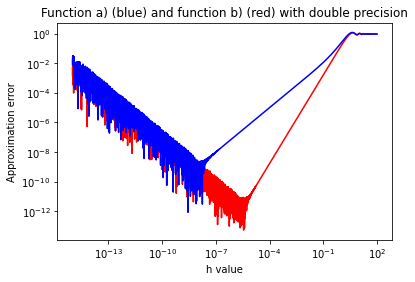

In [5]:
# Poniższy kod użyty tylko do wygenerowania wykresów do raportu
x = np.logspace(-15, 2, num=10**4, dtype=np.float64)
y = calculate_error_b(x, precision=np.float64)
z = calculate_error_a(x, precision=np.float64)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function a) (blue) and function b) (red) with double precision")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')
plt.plot(x,z, 'b')

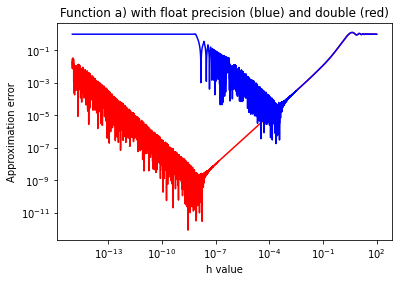

In [218]:
x = np.logspace(-15, 2, num=10**4, dtype=np.float64)
y = calculate_error_a(x, precision=np.float64)
z = calculate_error_a(x, precision=np.float32)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function a) with float precision (blue) and double (red)")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')
plt.plot(x,z, 'b')

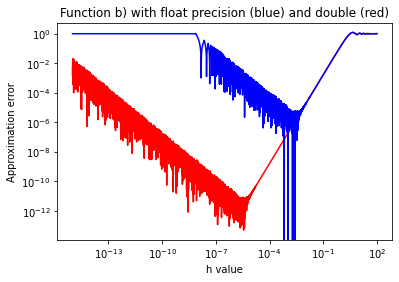

In [220]:
x = np.logspace(-15, 2, num=10**4, dtype=np.float64)
y = calculate_error_b(x, precision=np.float64)
z = calculate_error_b(x, precision=np.float32)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function b) with float precision (blue) and double (red)")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')
plt.plot(x,z, 'b')

C:\Users\aleks\AppData\Local\Temp\ipykernel_14832\2996565970.py:31: RuntimeWarning: overflow encountered in exp
  return (precision(function(argument+h_value)) - precision(function(argument-h_value))) / (2*h_value)


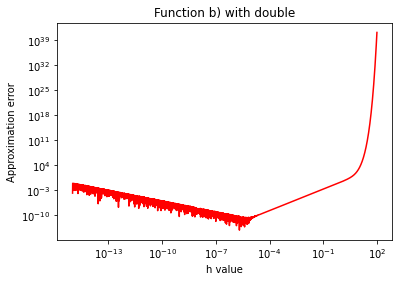

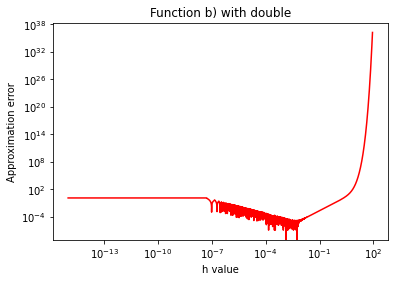

In [224]:
# INNE FUNKCJE : Eksponenta, double
x = np.logspace(-15, 2, num=10**4, dtype=np.float64)
y = calculate_error_b(x, function=np.exp, derivative=np.exp, precision=np.float64)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function b) with double")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')

# Float
x = np.logspace(-15, 2, num=10**4, dtype=np.float32)
y = calculate_error_b(x, function=np.exp, derivative=np.exp, precision=np.float32)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylabel("Approximation error")
plt.title("Function b) with double")
plt.xlabel("h value")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x,y, 'r')